#### Assi-6. Write a program implement backpropagation algorithm.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Datasets\seeds_dataset.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<Figure size 1200x1000 with 0 Axes>

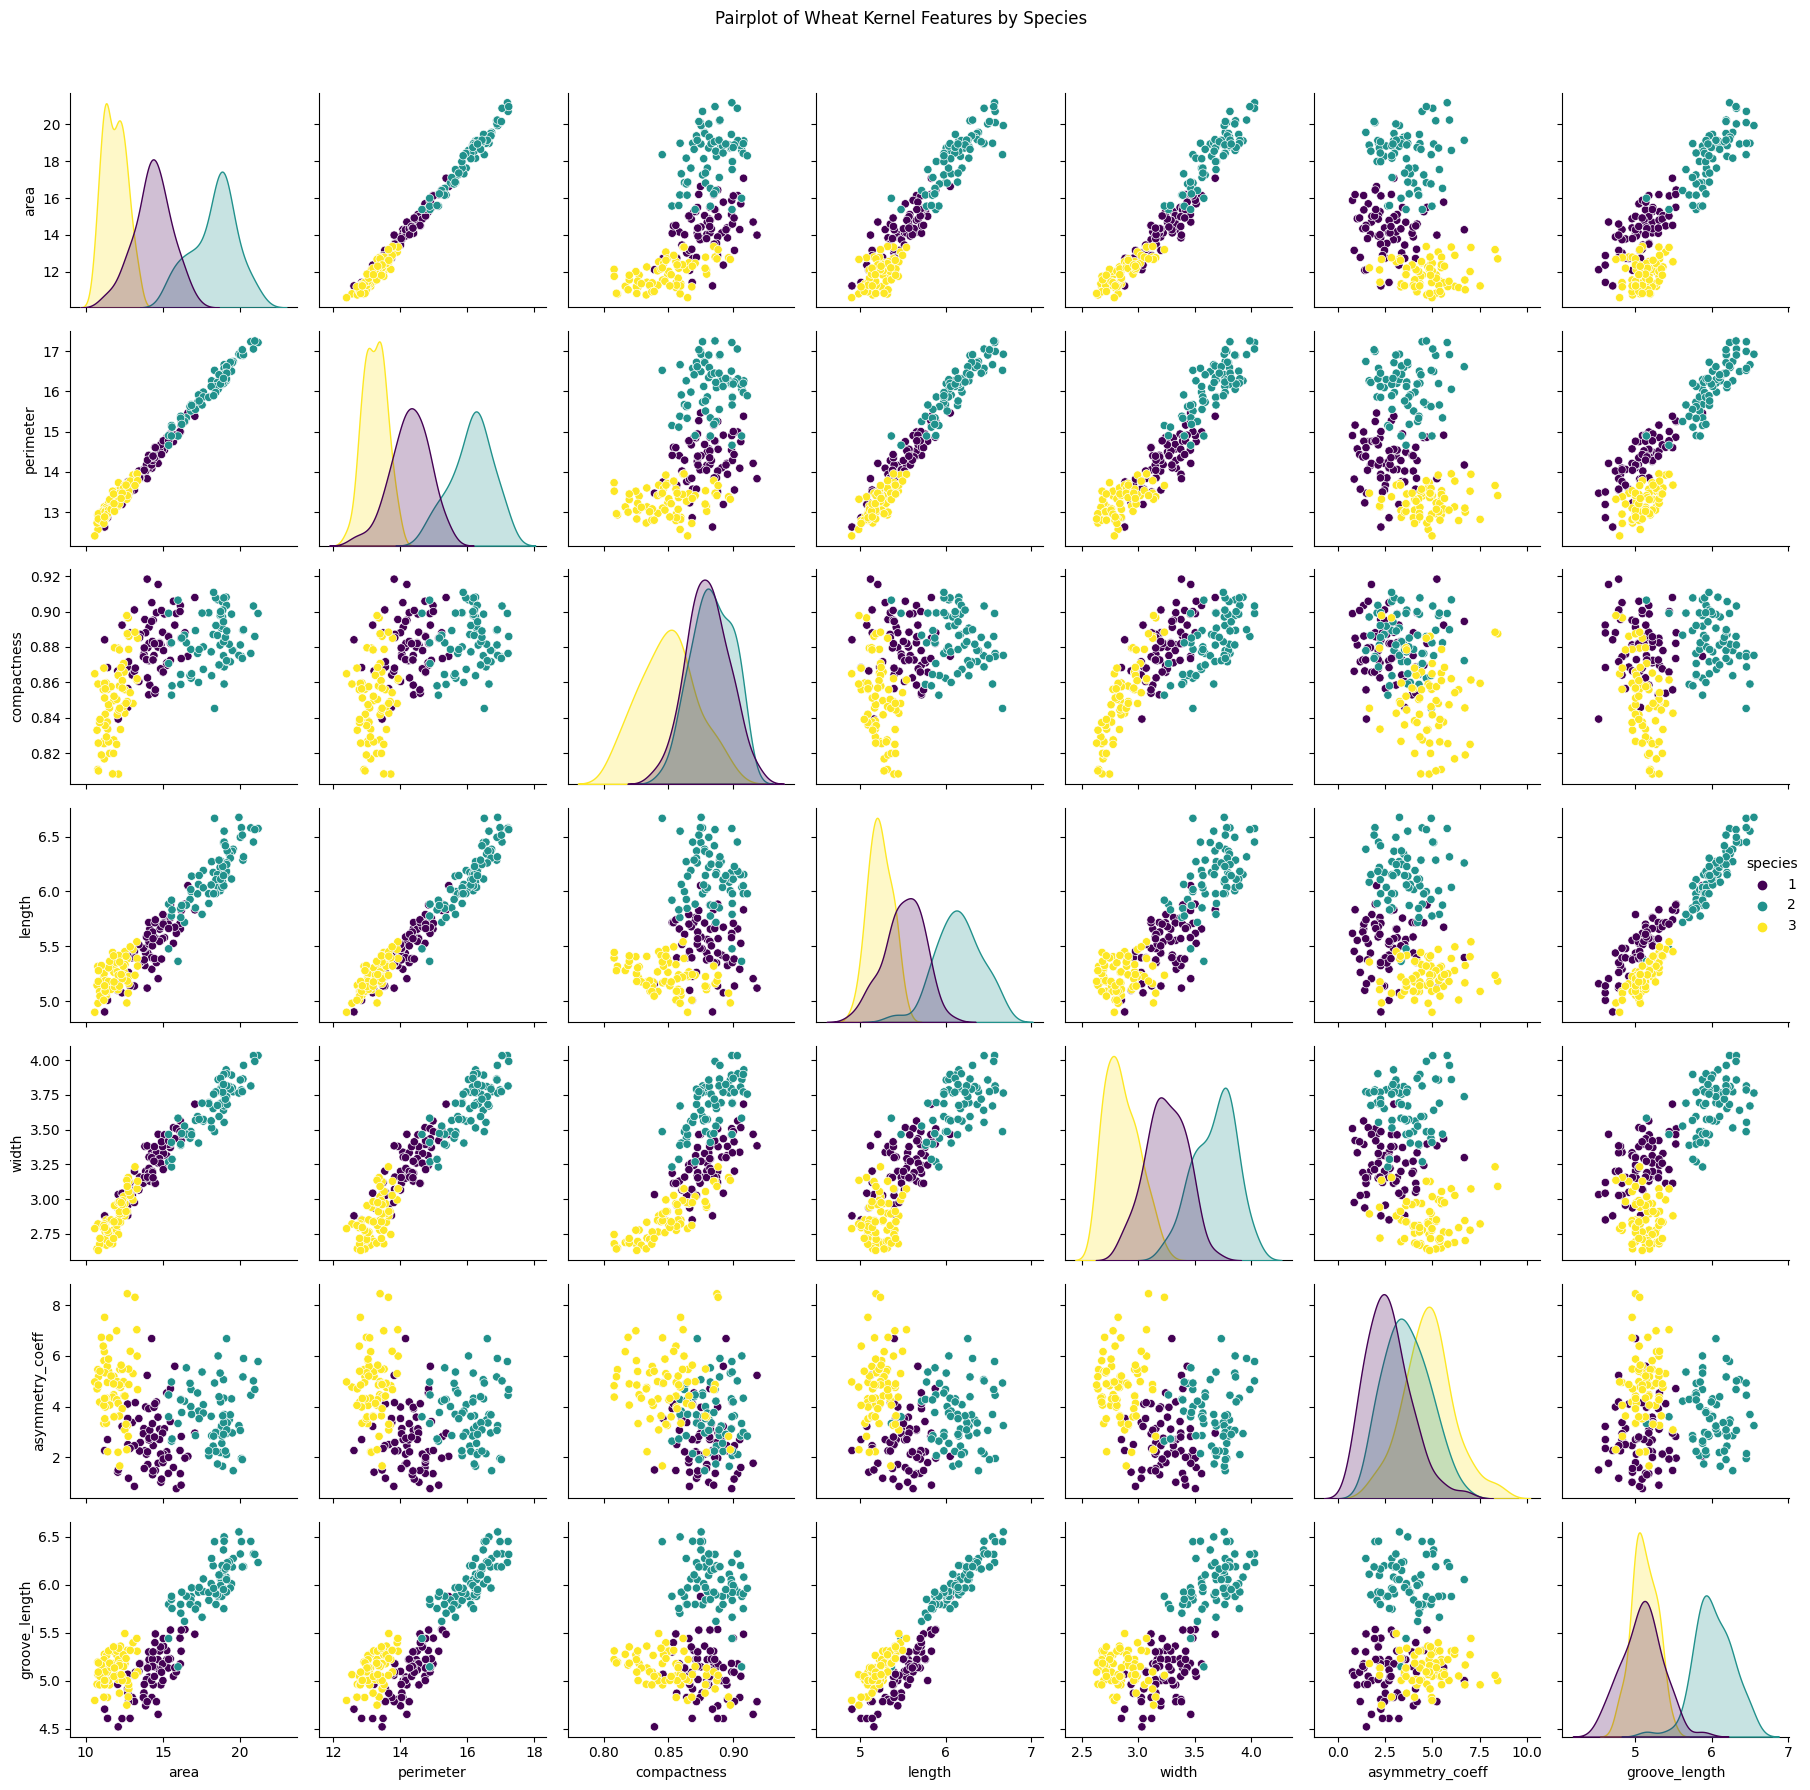

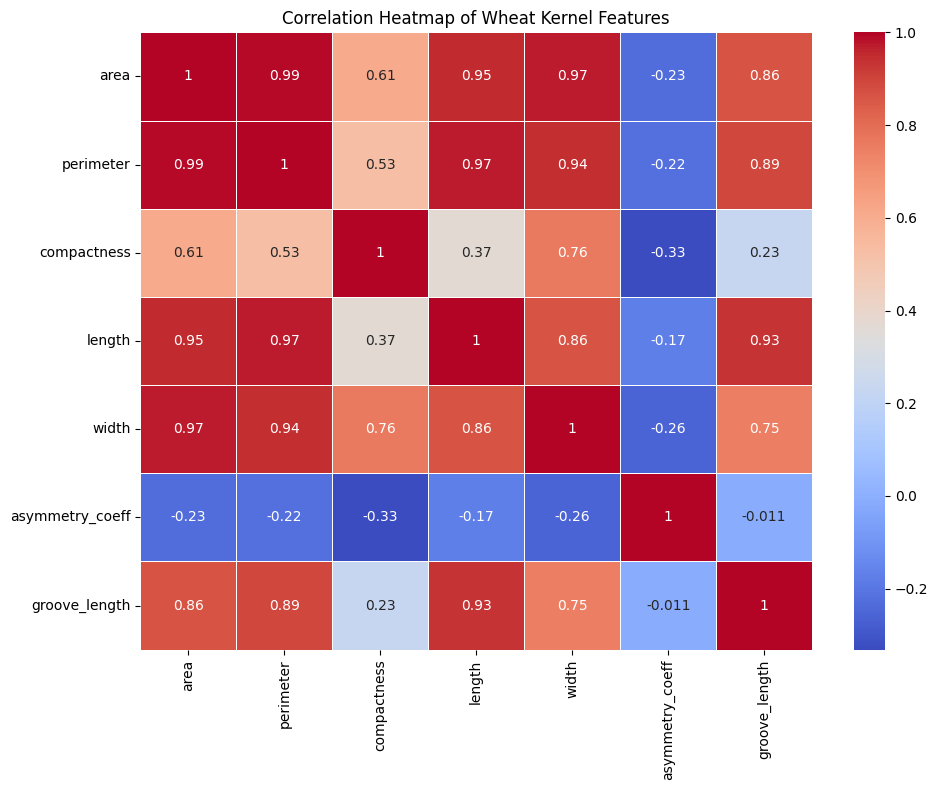

In [2]:
data.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coeff', 'groove_length', 'species']

# 1. Pairplot of features colored by species
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='species', palette='viridis')
plt.suptitle('Pairplot of Wheat Kernel Features by Species', y=1.02)
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wheat Kernel Features')
plt.tight_layout()
plt.show()



Epoch 0, Loss: 0.3106095714377483
Epoch 1000, Loss: 0.013734266286247394
Epoch 2000, Loss: 0.009346622178603513
Epoch 3000, Loss: 0.006623531498092164
Epoch 4000, Loss: 0.004902131368694311
Epoch 5000, Loss: 0.0037964615975792874
Epoch 6000, Loss: 0.003039047040936976
Epoch 7000, Loss: 0.0024895811199192263
Epoch 8000, Loss: 0.002075722716991422
Epoch 9000, Loss: 0.0017562489406714123


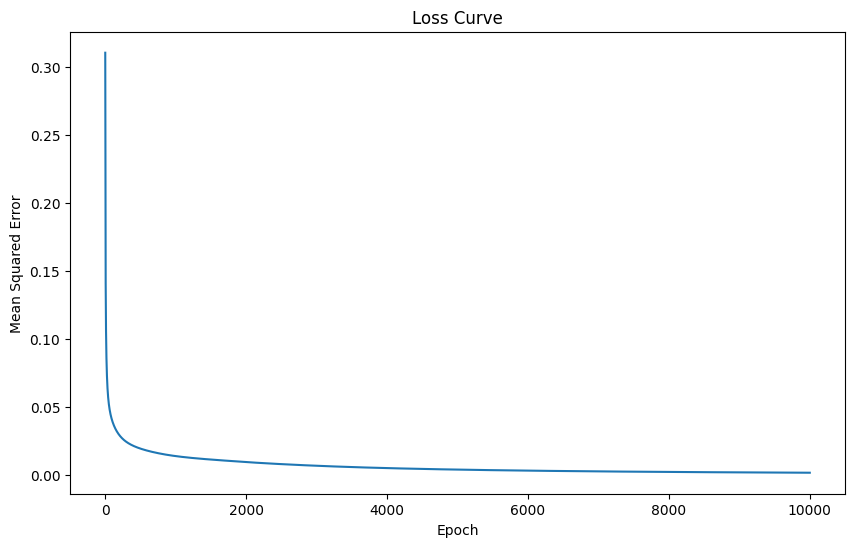

Test Accuracy: 97.62%


In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target variable
y = pd.get_dummies(y).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    bias_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    bias_output = np.zeros((1, output_size))
    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    hidden_layer = sigmoid(np.dot(X, weights_input_hidden) + bias_hidden)
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output) + bias_output)
    return hidden_layer, output_layer

def backward_propagation(X, y, hidden_layer, output_layer, weights_hidden_output):
    output_error = y - output_layer
    output_delta = output_error * sigmoid_derivative(output_layer)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

    return output_delta, hidden_delta

def update_parameters(X, hidden_layer, output_delta, hidden_delta, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate):
    weights_hidden_output += learning_rate * np.dot(hidden_layer.T, output_delta)
    bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
    weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
    bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

def train_neural_network(X, y, hidden_size, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = y.shape[1]

    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = initialize_parameters(input_size, hidden_size, output_size)

    losses = []

    for epoch in range(epochs):
        hidden_layer, output_layer = forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
        output_delta, hidden_delta = backward_propagation(X, y, hidden_layer, output_layer, weights_hidden_output)
        weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = update_parameters(X, hidden_layer, output_delta, hidden_delta, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, learning_rate)

        loss = np.mean(np.square(y - output_layer))
        losses.append(loss)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output, losses

# Train the neural network
hidden_size = 10
epochs = 10000
learning_rate = 0.01

trained_weights_input_hidden, trained_bias_hidden, trained_weights_hidden_output, trained_bias_output, losses = train_neural_network(X_train, y_train, hidden_size, epochs, learning_rate)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

# Evaluate the model
def predict(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    hidden_layer, output_layer = forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    return np.argmax(output_layer, axis=1)

y_pred = predict(X_test, trained_weights_input_hidden, trained_bias_hidden, trained_weights_hidden_output, trained_bias_output)
y_test_labels = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_test_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")